In [4]:
!pip install kagglehub



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install --upgrade xgboost


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import kagglehub

path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: /Users/evelyncasillas/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1


In [10]:
import os

 # Set the directory path here
files = os.listdir(path)

print("Files in dataset directory:", files)

Files in dataset directory: ['StudentsPerformance.csv']


In [17]:
import pandas as pd

csv_file_path = os.path.join(path, 'StudentsPerformance.csv')

data = pd.read_csv(csv_file_path)

In [18]:
print(data.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [19]:
data.shape

(1000, 8)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
#No missing variables
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Histogram of race/ethnicity


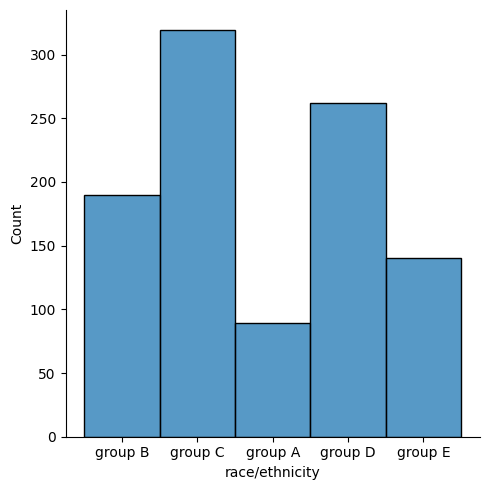

In [25]:
import seaborn as sns

print('Histogram of race/ethnicity')
sns.displot(data=data['race/ethnicity'])

Histogram of math score


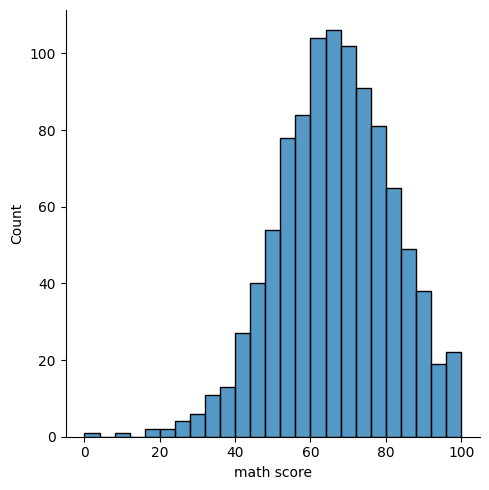

In [26]:
print('Histogram of math score')
sns.displot(data=data['math score'])

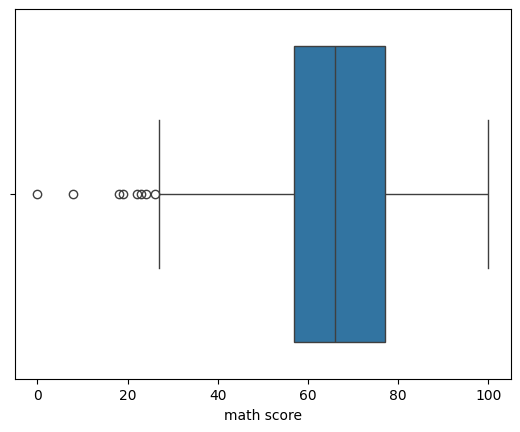

In [27]:
#Boxplot for math scores

import matplotlib.pyplot as plt

sns.boxplot(x='math score', data=data)

plt.show()



Histogram of reading score


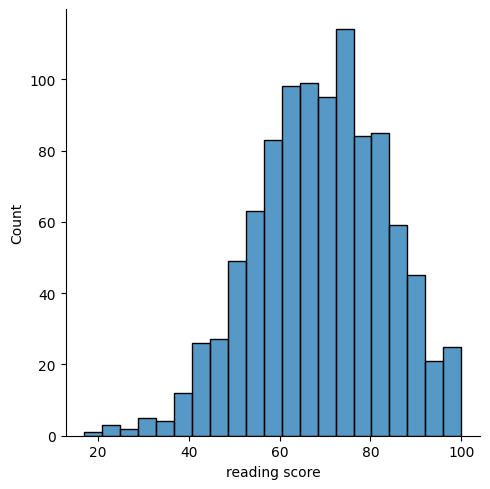

In [28]:
print('Histogram of reading score')
sns.displot(data=data['reading score'])

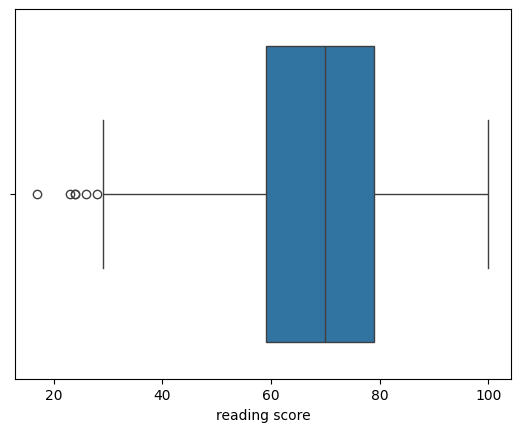

In [29]:
#Boxplot for reading scores


sns.boxplot(x='reading score', data=data)

plt.show()


In [32]:
 import pandas as pd

numeric_columns = data.select_dtypes(include=['number']).columns

mask = pd.Series([True] * len(data))

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    column_mask = (data[column] >= (Q1 - 1.5 * IQR)) & (data[column] <= (Q3 + 1.5 * IQR))
    
    mask &= column_mask

df_no_outliers = data[mask]

print(df_no_outliers)


     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

Histogram of writing score


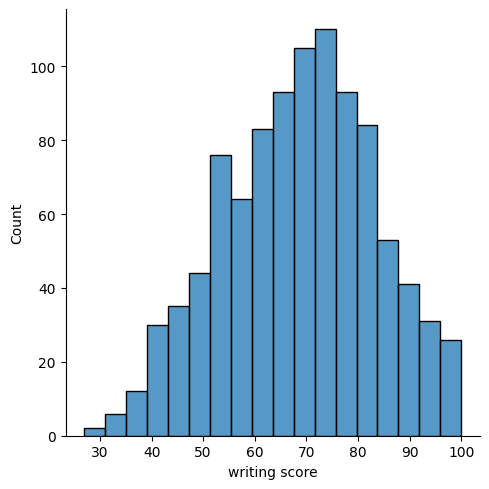

In [33]:
print('Histogram of writing score')
sns.displot(data=df_no_outliers['writing score'])

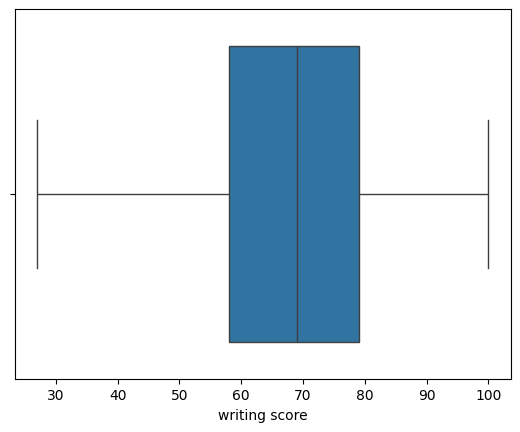

In [34]:
#Boxplot for writing scores


sns.boxplot(x='writing score', data=df_no_outliers)

plt.show()


In [35]:
num_vars = ['reading score', 'writing score', 'math score']
df_cat = df_no_outliers.drop(num_vars, axis = 1)
for col in list(df_cat):
  print("\n", data[col].value_counts(dropna=False).to_string())


 gender
female    518
male      482

 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89

 parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59

 lunch
standard        645
free/reduced    355

 test preparation course
none         642
completed    358


In [36]:
data_filtered = df_no_outliers

data_filtered.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
print(data_filtered.describe())


       math score  reading score  writing score
count  988.000000     988.000000     988.000000
mean    66.625506      69.640688      68.566802
std     14.409394      14.016760      14.525267
min     27.000000      29.000000      27.000000
25%     57.000000      60.000000      58.000000
50%     66.000000      70.000000      69.000000
75%     77.000000      80.000000      79.000000
max    100.000000     100.000000     100.000000


In [38]:
# Use One Hot Encoding to turn categorical variables with 3+ values into dummy variables: 

df_encod = pd.get_dummies(data_filtered, columns=['parental level of education'])

df_encod[df_encod.select_dtypes(bool).columns] = df_encod.select_dtypes(bool).apply(lambda x: x.astype(int))


df_encod.describe()

df_encod.shape

(988, 13)

In [39]:
dataone = df_encod

dataone.shape

(988, 13)

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataone['race/ethnicity_num'] = le.fit_transform(df_encod['race/ethnicity'])

print(dataone['race/ethnicity_num'].describe())

dataone.describe()


count    988.000000
mean       2.181174
std        1.156704
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: race/ethnicity_num, dtype: float64


,math score,reading score,writing score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,race/ethnicity_num
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,66.625506,69.640688,68.566802,0.223684,0.119433,0.195344,0.059717,0.224696,0.177126,2.181174
std,14.409394,14.016760,14.525267,0.416924,0.324462,0.396666,0.237081,0.417594,0.381968,1.156704
min,27.000000,29.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,60.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,66.000000,70.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,77.000000,80.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [43]:
df_filt = dataone.drop(['race/ethnicity'], axis = 1)
df_filt.shape

(988, 13)

In [49]:
#Splitting Data and only keeping reading writing and math scores for assignment


X = df_filt.drop(columns = ["race/ethnicity_num", "gender", "lunch", "test preparation course", 
                            "parental level of education_associate's degree",
                            "parental level of education_bachelor's degree",
                            "parental level of education_high school",
                            "parental level of education_master's degree",
                            "parental level of education_some college",
                            "parental level of education_some high school"])

y = df_filt['race/ethnicity_num'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 88, stratify=y)

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)



X_train.shape:  (790, 3)
y_train.shape:  (790,)
X_test.shape:  (198, 3)
y_test.shape:  (198,)


In [53]:


Corrlelationmatrix = df_filt.drop(columns=["parental level of education_associate's degree",
                          "parental level of education_bachelor's degree",
                          "parental level of education_high school",
                          "parental level of education_master's degree",
                          "parental level of education_some college",
                          "parental level of education_some high school"
                                           "Gender"])





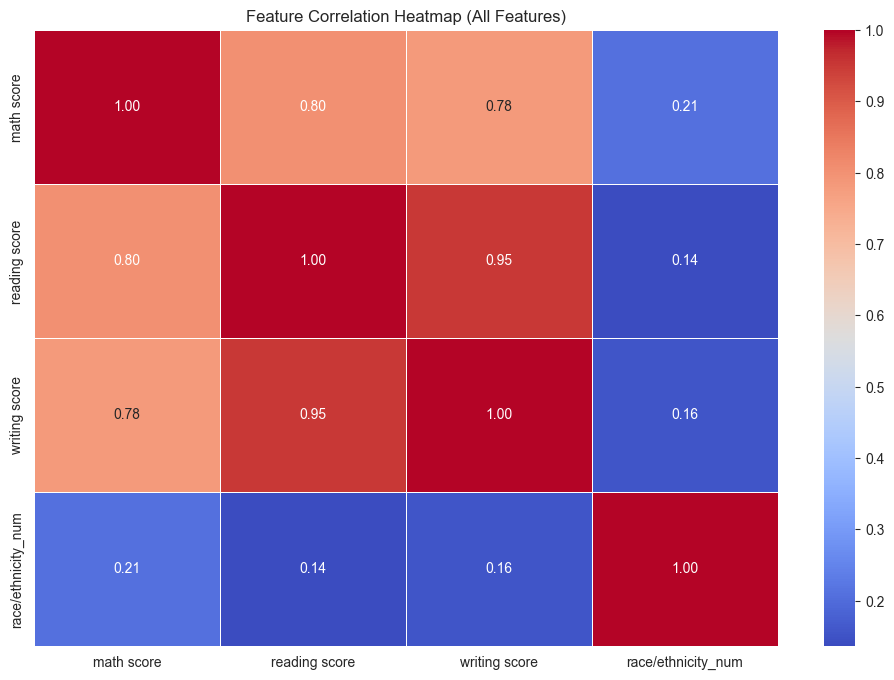

In [59]:
correlation_matrix = df_filt.drop(columns=[
    "parental level of education_associate's degree",
    "parental level of education_bachelor's degree",
    "parental level of education_high school",
    "parental level of education_master's degree",
    "parental level of education_some college",
    "parental level of education_some high school",
    "gender",
    "lunch",
    "test preparation course"# Added missing comma here
])

# Assuming X and y are already defined, and X is the feature set
data_clean = X.copy()
data_clean["race/ethnicity_num"] = y  # Ensure y is correctly defined

# Calculate the correlation matrix
corr_matrix = correlation_matrix.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (All Features)")
plt.show()

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

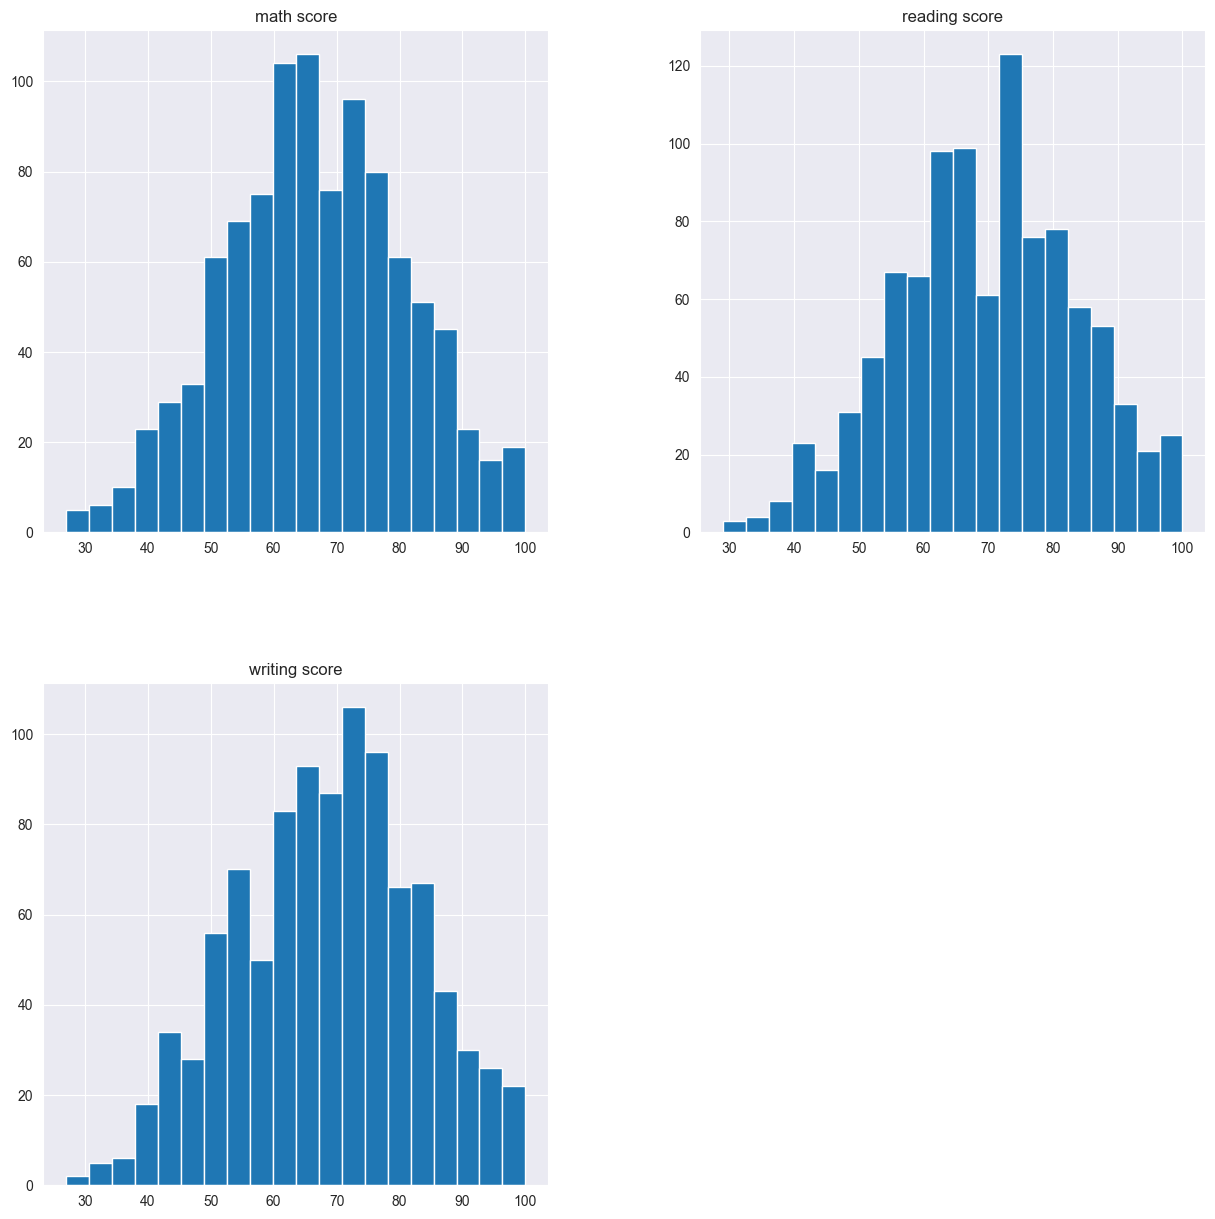

In [60]:
X.hist(bins=20, figsize=(15, 15))

In [63]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'alpha': [0, 0.1, 1],
    'lambda': [0, 0.1, 1]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'alpha': 0.1, 'lambda': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [64]:

#XGBoost
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor




model1 = XGBClassifier(
    alpha=0.1,
    reg_lambda= 0,
    learning_rate= 0.01,
    n_estimators=100,    
    max_depth=3
)

model1.fit(X_train, y_train)

predictions1= model1.predict(X_train)
print('\nTarget on Train:\n', predictions1)

accuracy_train1 = accuracy_score(y_train, predictions1) 
print('\nTraining Accuracy:', accuracy_train1)

predictions_test1= model1.predict(X_test)
print('\n Target on Test:\n', predictions_test1)

accuracy_test1= accuracy_score(y_test, predictions_test1)
print('\n Testing Accuracy:', accuracy_test1)


Target on Train:
 [3 2 2 4 2 4 2 2 3 2 1 2 3 2 3 2 2 2 2 3 2 2 2 2 3 2 2 3 2 4 2 2 3 2 2 2 3
 3 2 2 2 2 2 2 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 3
 2 3 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 3 3 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 2 2 4
 3 2 2 2 2 4 2 3 3 2 2 2 3 3 2 4 2 2 2 2 2 3 2 2 2 2 2 3 4 2 2 4 2 3 2 2 2
 3 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 3 2 3 2 2 2 2 3 2 2 2 2 3 2 2 3 2 4 3 2
 2 2 3 2 2 2 2 3 2 2 2 2 3 2 3 2 4 2 2 2 3 2 3 1 2 3 2 2 2 2 3 2 2 2 3 2 2
 2 4 2 3 2 2 2 1 2 3 2 2 2 2 2 2 4 2 2 2 1 2 2 2 4 2 3 2 2 4 2 2 2 2 2 2 2
 2 4 3 2 4 3 2 2 4 3 1 2 2 4 4 2 1 2 2 2 3 3 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 3 2 3 2 2 2 1 2 2 2 3 3 2 2 3 3 3 2 2 3 2 2 2 2 1 2 4 2 2 2
 2 2 2 2 4 3 2 2 3 2 2 2 2 3 2 4 2 2 2 2 3 2 4 3 2 4 3 3 2 2 3 4 2 2 2 2 3
 2 2 3 3 2 2 2 2 2 2 2 2 2 3 4 2 2 2 3 2 2 2 2 2 2 2 2 2 2 4 4 2 3 4 2 3 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 2 3 2 2 2 2 2 2 2 3 2 3 2 3 2 3 2 3 3
 2 2 2 2 3 2 3 2 2 3 2 2 1 2 2 2 2 3 2 2 3 2 2 2 2 2 1 2 2 1 2 2 1 2 3 4 2
 2 1 2

[[ 0  2 14  2  0]
 [ 0  0 25 10  2]
 [ 0  1 47 13  2]
 [ 0  1 33 16  2]
 [ 0  3 14  8  3]]


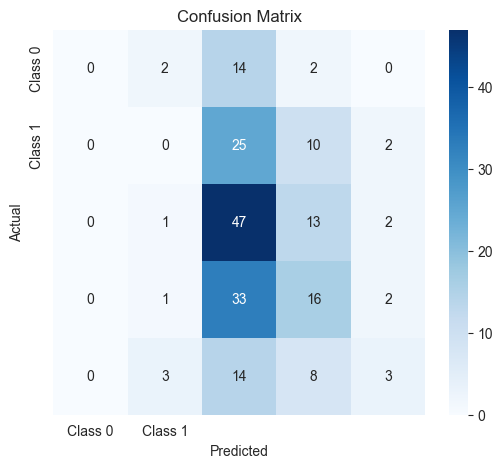

In [65]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

y_pred = model1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [68]:
import pickle

save_path = "/Users/evelyncasillas/PycharmProjects/Midterm/model1.pkl"

with open(save_path, "wb") as file:
    pickle.dump(model1, file)

print(f"\nModel saved at: {save_path}")


Model saved at: /Users/evelyncasillas/PycharmProjects/Midterm/model1.pkl


In [70]:
file_path = os.path.abspath("../model1.pkl")
with open(file_path, "wb") as file:
    pickle.dump(model1, file)

print(f"\nModel saved at: {file_path}")


Model saved at: /Users/evelyncasillas/PycharmProjects/model1.pkl
